In [1]:
%load_ext autoreload
%autoreload 2

# import pyACC
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM, Flatw0waCDM

In [2]:
import pyACC.cosmology as cosmo

In [3]:
Om = 0.35
H0 = 64

w0 = -0.43
wa = -1.75

cosmo_lcdm = FlatLambdaCDM(H0=H0, Om0=Om)
cosmo_w0wa = Flatw0waCDM(H0=H0, Om0=Om, w0=w0, wa=wa)

In [4]:
zlist = np.linspace(0, 3, 100)

dlist_lcdm = cosmo_lcdm.comoving_distance(zlist).value
dlist_w0wa = cosmo_w0wa.comoving_distance(zlist).value

In [5]:
hf_lcdm = cosmo.FlatLambdaCDM(H0=H0, Omega_m=Om)
hf_w0wa = cosmo.w0waFlatCDM(H0=H0, Omega_m=Om, w0=w0, wa=wa)

dlist_lcdm_pyACC = cosmo.Distances(hf_lcdm, False).comoving_distance(zlist, {})
dlist_w0wa_pyACC = cosmo.Distances(hf_w0wa, False).comoving_distance(zlist, {})

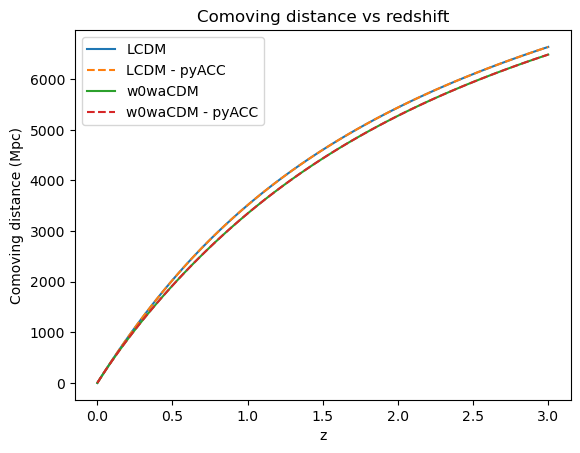

In [6]:
plt.plot(zlist, dlist_lcdm, label='LCDM')
plt.plot(zlist, dlist_lcdm_pyACC, label='LCDM - pyACC', linestyle='--')
plt.plot(zlist, dlist_w0wa, label='w0waCDM')
plt.plot(zlist, dlist_w0wa_pyACC, label='w0waCDM - pyACC', linestyle='--')
plt.xlabel('z')
plt.ylabel('Comoving distance (Mpc)')
plt.title('Comoving distance vs redshift')
plt.legend()

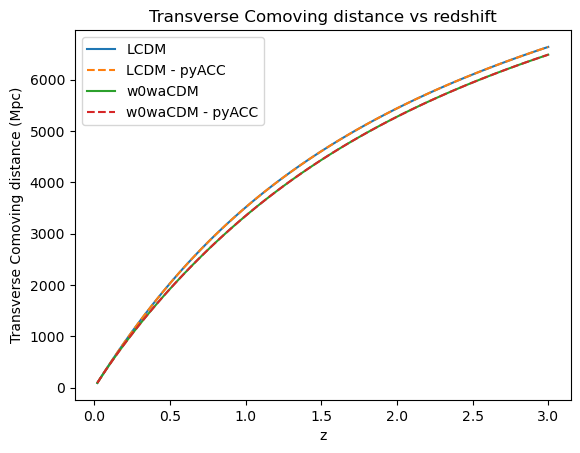

In [7]:
zlist = np.linspace(0.02, 3, 100)

dlist_lcdm = cosmo_lcdm.comoving_transverse_distance(zlist).value
dlist_w0wa = cosmo_w0wa.comoving_transverse_distance(zlist).value

dlist_lcdm_pyACC = cosmo.Distances(hf_lcdm, False).transverse_comoving_distance(zlist, {})
dlist_w0wa_pyACC = cosmo.Distances(hf_w0wa, False).transverse_comoving_distance(zlist, {})

plt.plot(zlist, dlist_lcdm, label='LCDM')
plt.plot(zlist, dlist_lcdm_pyACC, label='LCDM - pyACC', linestyle='--')
plt.plot(zlist, dlist_w0wa, label='w0waCDM')
plt.plot(zlist, dlist_w0wa_pyACC, label='w0waCDM - pyACC', linestyle='--')
plt.xlabel('z')
plt.ylabel('Transverse Comoving distance (Mpc)')
plt.title('Transverse Comoving distance vs redshift')
plt.legend()

In [8]:
# DESI data
import pandas as pd

df = pd.read_csv("/Users/alfovero/Downloads/extracted_table.csv")

In [9]:
rs = lambda wb, wc, Neff : 147.05 * (wb / 0.02236) ** -0.13 * ( (wc+wb)/ 0.1432) ** -0.23 * (Neff / 3.04) ** -0.1

In [12]:
 (0.00064420 + 0.1200 +  0.02237)/0.6736**2

0.31519186799329724

(0.93, 1.05)

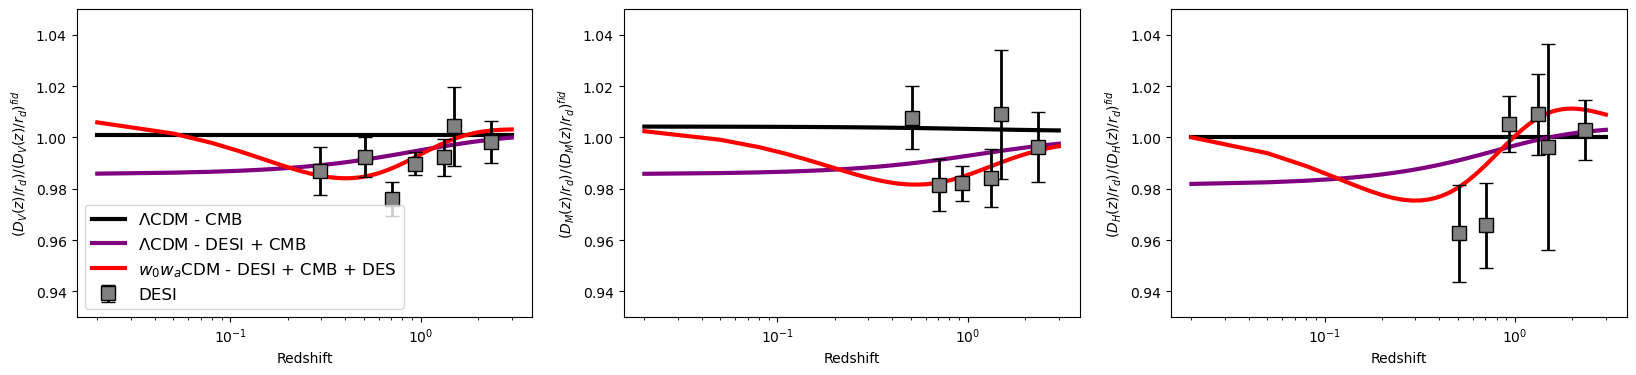

In [24]:
zlist = np.linspace(0.02, 3, 100)

rs_fid = rs(0.02237,  0.1200, 3.03)
H0 = 67.36
Om = (0.00064420 + 0.1200 +  0.02237)/0.6736**2
hf_fid = cosmo.FlatLambdaCDM(H0=H0, Omega_m=Om)
dist_fid = cosmo.Distances(hf_fid, False)


H0 = 67.14
Om = 0.3168
rs_planck = rs(0.02236, 0.3168*0.6714**2-0.02236, 3.04)
hf_planck = cosmo.FlatLambdaCDM(H0=H0, Omega_m=Om)
dist_planck = cosmo.Distances(hf_planck, False)

H0 = 68.17
Om = 0.3027
rs_lcdm_DESI_CMB = rs(0.02236, Om*(H0/100)**2-0.02236, 3.04)
hf_lcdm_DESI_CMB = cosmo.FlatLambdaCDM(H0=H0, Omega_m=Om,)
dist_lcdm_DESI_CMB = cosmo.Distances(hf_lcdm_DESI_CMB, False)

H0 = 66.74
Om = 0.3191
w0 = -0.752
wa = -0.86
rs_w0wa_DESI_CMB_DES = rs(0.02236, Om*(H0/100)**2-0.02236, 3.04)
hf_w0wa_DESI_CMB_DES = cosmo.w0waFlatCDM(H0=H0, Omega_m=Om, w0=w0, wa=wa)
dist_w0wa_DESI_CMB_DES = cosmo.Distances(hf_w0wa_DESI_CMB_DES, False)


figure, ax = plt.subplots(1, 3, figsize=(20, 4))

for i in range(len(ax)):
    ax[i].set_xscale("log")
    ax[i].set_xlabel("Redshift")

for kind in ["fid", "planck", "lcdm_DESI_CMB", "w0wa_DESI_CMB_DES"]:
    globals()["DV_"+kind] = globals()["dist_"+kind].isotropic_volume_distance(zlist, {})/globals()["rs_"+kind]
    globals()["DM_"+kind] = globals()["dist_"+kind].transverse_comoving_distance(zlist, {})/globals()["rs_"+kind]
    globals()["DH_"+kind] = globals()["dist_"+kind].hubble_distance(zlist, )/globals()["rs_"+kind]


ax[0].plot(zlist, Dv_planck/Dv_fid, ls="-", color="k", lw=3, label=r'$\Lambda$CDM - CMB')
ax[0].plot(zlist, Dv_lcdm_DESI_CMB/Dv_fid, ls="-", color="purple", lw=3, label=r'$\Lambda$CDM - DESI + CMB')
ax[0].plot(zlist, Dv_w0wa_DESI_CMB_DES/Dv_fid, ls="-", color="red", lw=3, label=r'$w_0 w_a$CDM - DESI + CMB + DES')

ax[1].plot(zlist, DM_planck/DM_fid, ls="-", color="k", lw=3, label=r'$\Lambda$CDM - CMB')
ax[1].plot(zlist, DM_lcdm_DESI_CMB/DM_fid, ls="-", color="purple", lw=3, label=r'$\Lambda$CDM - DESI + CMB')
ax[1].plot(zlist, DM_w0wa_DESI_CMB_DES/DM_planck, ls="-", color="red", lw=3, label=r'$w_0 w_a$CDM - DESI + CMB + DES')

ax[2].plot(zlist, DH_planck/DH_planck, ls="-", color="k", lw=3, label=r'$\Lambda$CDM - CMB')
ax[2].plot(zlist, DH_lcdm_DESI_CMB/DH_planck, ls="-", color="purple", lw=3, label=r'$\Lambda$CDM - DESI + CMB')
ax[2].plot(zlist, DH_w0wa_DESI_CMB_DES/DH_planck, ls="-", color="red", lw=3, label=r'$w_0 w_a$CDM - DESI + CMB + DES')


dv_fid_data = cosmo.Distances(hf_fid, False).isotropic_volume_distance(df["z_eff"].to_numpy(), {})/rs_fid
dm_fid_data = cosmo.Distances(hf_fid, False).transverse_comoving_distance(df["z_eff"].to_numpy(), {})/rs_fid
dh_fid_data = cosmo.Distances(hf_fid, False).hubble_distance(df["z_eff"].to_numpy())/rs_fid

dv_data = df["D_V/r_d"].to_numpy() / dv_fid_data
dv_err = df["D_V/r_d_err"].to_numpy() / dv_fid_data

ax[0].errorbar(df["z_eff"].to_numpy(), dv_data, yerr=dv_err, fmt='s', mec="k", mfc="0.5", color='black', label='DESI', markersize=10, elinewidth=2, capsize=5)

data = df["D_M/r_d"].to_numpy() / dm_fid_data
err = df["D_M/r_d_err"].to_numpy() / dm_fid_data

ax[1].errorbar(df["z_eff"].to_numpy(), data, yerr=err, fmt='s', mec="k", mfc="0.5", color='black', markersize=10, elinewidth=2, capsize=5)

data = df["D_H/r_d"].to_numpy() / dh_fid_data
err = df["D_H/r_d_err"].to_numpy() / dh_fid_data

ax[2].errorbar(df["z_eff"].to_numpy(), data, yerr=err, fmt='s', mec="k", mfc="0.5", color='black', markersize=10, elinewidth=2, capsize=5)

ax[0].set_ylabel(r"$ (D_V(z)/r_d) / (D_V(z)/r_d)^{fid} $")
ax[1].set_ylabel(r"$ (D_M(z)/r_d) / (D_M(z)/r_d)^{fid} $")
ax[2].set_ylabel(r"$ (D_H(z)/r_d) / (D_H(z)/r_d)^{fid} $")

ax[0].legend(loc='lower left', fontsize=12)

ax[0].set_ylim(0.93, 1.05)
ax[1].set_ylim(0.93, 1.05)
ax[2].set_ylim(0.93, 1.05)